# 圧縮と解凍をサクッとやる


In [1]:
import zlib
import gzip
import bz2

In [32]:
# 短い文章データの圧縮
s = b'witch which has which witches wrist watch'
print("圧縮前: " + str(len(s)))

t = zlib.compress(s)
%time print("zlib 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = gzip.compress(s)
%time print("gzip 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = bz2.compress(s)
%time print("bz2　圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

圧縮前: 41
zlib 圧縮後: 37, 圧縮率: 10%
CPU times: user 1.95 ms, sys: 1.97 ms, total: 3.92 ms
Wall time: 2.35 ms
gzip 圧縮後: 49, 圧縮率: -20%
CPU times: user 370 µs, sys: 129 µs, total: 499 µs
Wall time: 388 µs
bz2　圧縮後: 62, 圧縮率: -51%
CPU times: user 93 µs, sys: 27 µs, total: 120 µs
Wall time: 127 µs


In [31]:
# 長い文章データの圧縮
s = open('wagahai.txt', 'rb').read()

print("圧縮前: " + str(len(s)))

t = zlib.compress(s)
%time print("zlib 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = gzip.compress(s)
%time print("gzip 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = bz2.compress(s)
%time print("bz2　圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

圧縮前: 1046582
zlib 圧縮後: 371278, 圧縮率: 65%
CPU times: user 68 µs, sys: 30 µs, total: 98 µs
Wall time: 103 µs
gzip 圧縮後: 366791, 圧縮率: 65%
CPU times: user 67 µs, sys: 35 µs, total: 102 µs
Wall time: 107 µs
bz2　圧縮後: 256755, 圧縮率: 75%
CPU times: user 53 µs, sys: 27 µs, total: 80 µs
Wall time: 103 µs


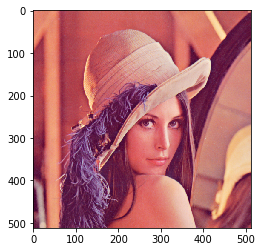

圧縮前: 625665
zlib 圧縮後: 625702, 圧縮率: 0%
CPU times: user 372 µs, sys: 165 µs, total: 537 µs
Wall time: 933 µs
gzip 圧縮後: 625714, 圧縮率: 0%
CPU times: user 63 µs, sys: 31 µs, total: 94 µs
Wall time: 98.9 µs
bz2　圧縮後: 628505, 圧縮率: 0%
CPU times: user 72 µs, sys: 22 µs, total: 94 µs
Wall time: 98 µs


In [30]:
# 画像データの圧縮

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('lena_std.png')
plt.imshow(img)
plt.show()

s = open("lena_std.png", "rb").read()

print("圧縮前: " + str(len(s)))

t = zlib.compress(s)
%time print("zlib 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = gzip.compress(s)
%time print("gzip 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = bz2.compress(s)
%time print("bz2　圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

In [33]:
# 音声データの圧縮
import wave
import pyaudio
CHUNK = 1024

wf = wave.open('J.S.Bach-G-air.wav')
p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
               channels=wf.getnchannels(),
               rate=wf.getframerate(),
               output=True)

data = wf.readframes(CHUNK)

while len(data)>0:
    
    stream.write(data)
    data = wf.readframes(CHUNK)
    
stream.stop_stream()
stream.close()

p.terminate()

s = open("J.S.Bach-G-air.wav", "rb").read()

print("圧縮前: " + str(len(s)))

t = zlib.compress(s)
%time print("zlib 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = gzip.compress(s)
%time print("gzip 圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

t = bz2.compress(s)
%time print("bz2　圧縮後: " + str(len(t)) + ", 圧縮率: " + str(round((len(s) - len(t))/len(s)*100)) + "%")

圧縮前: 57508096
zlib 圧縮後: 51550956, 圧縮率: 10%
CPU times: user 93 µs, sys: 30 µs, total: 123 µs
Wall time: 127 µs
gzip 圧縮後: 51544949, 圧縮率: 10%
CPU times: user 70 µs, sys: 30 µs, total: 100 µs
Wall time: 106 µs
bz2　圧縮後: 49188258, 圧縮率: 14%
CPU times: user 69 µs, sys: 30 µs, total: 99 µs
Wall time: 104 µs


In [15]:

wf.